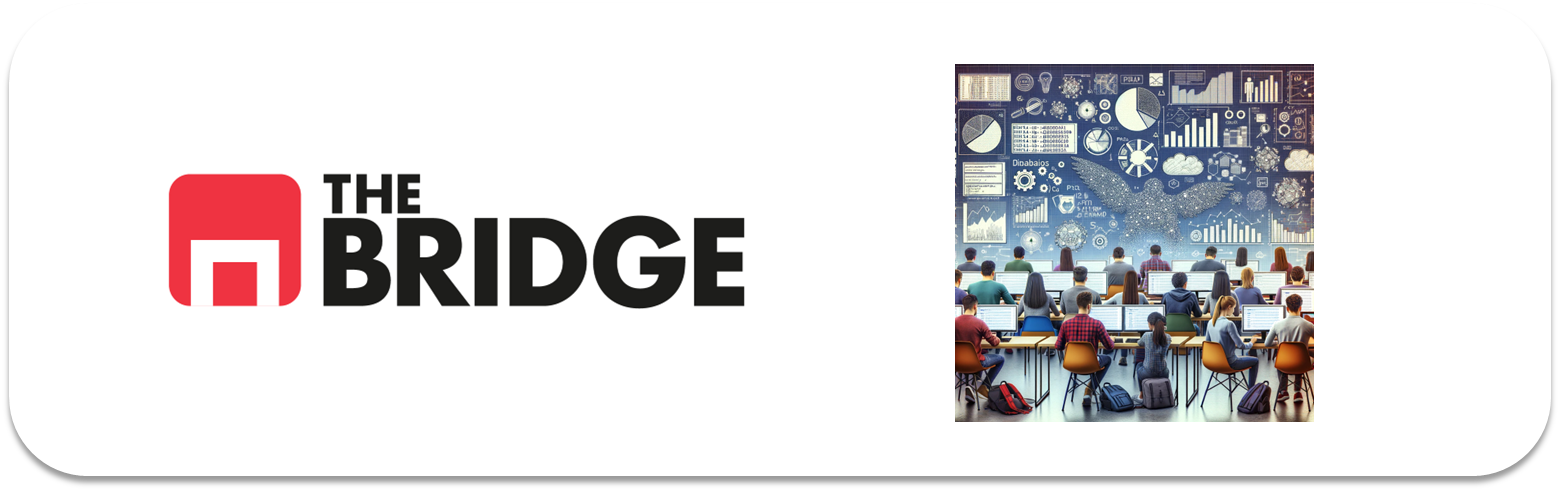

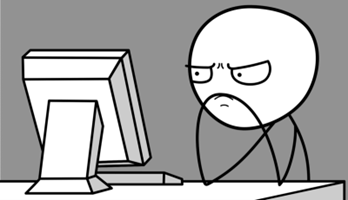

Para ejercitarte y afianzar lo aprendido sobre **Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Ejercicio 1

Carga el dataset de advertising, convierte la variable edad a numérica y haz el split en train y test como hicimos en la tanda de ejercicios anterior (usa una semilla de 42 y un reparto 80-20)

In [2]:
df = pd.read_csv("./data/advertising_ml.csv")

In [3]:
df["Age"] = df.Age.str.replace(r"[year|años]","", regex= True).astype(int) 

In [4]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

### Ejercicio 2

Aunque es algo que debemos hacer en la parte del EDA del dataset para no sobrecargar los ejercicios anteriores hemos dejado para este momento el análisis del target. Muestra las frecuencias absolutas y frecuencias relativas del target (no hace falta que hagas un gráfico)

*Frecuencias Absolutas*

In [5]:
train_set["Clicked on Ad"].value_counts()

Clicked on Ad
0    411
1    389
Name: count, dtype: int64

*Frecuencias Relativas*



In [6]:
train_set["Clicked on Ad"].value_counts(normalize = True)

Clicked on Ad
0    0.51375
1    0.48625
Name: proportion, dtype: float64

*Los valores son similares, lo cual es una suerte. Tenemos un dataset que se dice balanceado, de no haber sido similares tendríamos que haber hecho algo más como ya veremos en sprints posteriores*

### Ejercicio 3

Vamos a tratar las categóricas que se nos quedaron en el tintero: "City" y "Country" (recuerda que descartamos "Male" por su distribución de valores respecto al target que vimos en la gráfica del último ejercicio). Vuelve a calcular la cardinalidad de "City" y los valores que más se repiten:

In [7]:
df.City.nunique()

969

In [8]:
df.City.value_counts().nlargest(10)

City
Lisamouth          3
Williamsport       3
Wrightburgh        2
Lake Jose          2
Robertfurt         2
New Sheila         2
Lake Susan         2
New Jessicaport    2
Benjaminchester    2
Lake James         2
Name: count, dtype: int64

*Esta variable es muy interesante ya que tiene un porcentaje de variación muy alto (casi es única) y por lo tanto es poco informativa en el sentido de que no podemos asociar estadísticamente a ningún valor una relación destacada con la variable target, curiosamente lo mismo que nos ocurriría con una vairable que tuviera un único valor...*


Independientemente de lo que hayas visto, descartamos "City" (mira la solución para una argumentación). Y nos centramos en Country.

### Ejercicio 4

Para "Country" obtén las 5 ciudades que más se repiten y para estas las distribución de valores de "Clicked on Ad" 

In [9]:
df.Country.value_counts().nlargest(5)

Country
France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Name: count, dtype: int64

In [10]:
top_5 = df.Country.value_counts().nlargest(5).index.to_list()
df[df.Country.isin(top_5)].groupby("Country")["Clicked on Ad"].value_counts(normalize= True)

Country         Clicked on Ad
Czech Republic  0                0.555556
                1                0.444444
France          1                0.555556
                0                0.444444
Greece          0                0.625000
                1                0.375000
Peru            1                0.625000
                0                0.375000
Turkey          1                0.875000
                0                0.125000
Name: proportion, dtype: float64

*Dentro de lo que cabe puede que sí que la variable sea discriminativa (por ejemplo en Chequia y Francia no, porque la distribución casi es 50/50 es decir que si el cliente es de Francia el 50% clicka y el 50% no, eso hace que ser de Francia no nos diga mucho pero el resto parece que sí, fijate que ser de Turquía parece indicar que sí clica, ojo son muy pocos datos pero hace que sean interesantes*

### Ejercicio 5

Vamos a incluir "Country" y como es categórica debeos hacer una conversión a numérica. De los dos tipos de paso a numérica de una categórica, vamos a hacer un "One-hot encoding". Hazlo usando la función `get_dummies` de pandas. ¿Por qué crees que hacemos esta conversión?

In [11]:
train_set = pd.get_dummies(train_set, columns=["Country"])

*Mostramos las nuevas 270 y pico columnas*

In [12]:
train_set.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
29                      76.02   22     46179.97                209.82   
535                     78.76   32     70012.83                208.02   
695                     73.49   38     67132.46                244.23   
557                     79.67   28     58576.12                226.79   
836                     49.21   46     49206.40                115.60   

                                   Ad Topic Line          City  Male  \
29       Business-focused value-added definition  West Guybury     0   
535  Managed attitude-oriented Internet solution  East Valerie     1   
695             Organic 3rdgeneration encryption   Mosleyburgh     0   
557               Total grid-enabled application   Charlesbury     0   
836                          Realigned 24/7 core    Carterland     0   

               Timestamp  Clicked on Ad  Country_Afghanistan  ...  \
29   2016-01-27 12:38:16              0                False  ...   
535  2016-04-20 10:04:29              0                False  ...   
695  2016-02-14 11:36:08              0                False  ...   
557  2016-07-20 01:56:33              0                False  ...   
836  2016-02-28 03:34:35              1                False  ...   

     Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  Country_Venezuela  \
29             False               False            False              False   
535             True               False            False              False   
695            False               False             True              False   
557            False               False            False              False   
836            False               False            False              False   

     Country_Vietnam  Country_Wallis and Futuna  Country_Western Sahara  \
29             False                      False                   False   
535            False                      False                   False   
695            False                      False                   False   
557            False                      False                   False   
836            False                      False                   False   

     Country_Yemen  Country_Zambia  Country_Zimbabwe  
29           False           False             False  
535          False           False             False  
695          False           False             False  
557          False           False             False  
836          False           False             False  

[5 rows x 245 columns]

In [13]:
train_set.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Timestamp',
       'Clicked on Ad', 'Country_Afghanistan',
       ...
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela', 'Country_Vietnam', 'Country_Wallis and Futuna',
       'Country_Western Sahara', 'Country_Yemen', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=245)

*Empleamos el one-hot encoding por el hecho de que un ordinal no tendría sentido porque son demasiados valores y el modelo interpretaría las distancias entre etiquetas como distancias reales, de forma equivocada*

*Por otro lado son demasiadas columnas, y quizás podríamos quedarnos con los países de más variación y al resto meterlo en una única etiqueta (por continente por ejemplo), pero no lo haremos en este ejercicio*

### Ejercicio 6

Ahora vamos a hacer el escalado de las features numéricas que habíamos seleccionado en los ejercicios anteriores:

["Age","Area Income","Daily Internet Usage","Daily Time Spent on Site"]

En este caso vamos a emplear la standardization (revisa la píldora y aplicala a las variables anteriores). Muestra la media y la desviación estándar del resultado.

In [14]:
features_num = ["Age","Area Income","Daily Internet Usage","Daily Time Spent on Site"]
std_scaler = StandardScaler()
train_set[features_num] = pd.DataFrame(std_scaler.fit_transform(train_set[features_num]),columns = features_num)


In [15]:
train_set[features_num].describe()

Age  Area Income  Daily Internet Usage  Daily Time Spent on Site
count  644.000000   644.000000            644.000000                644.000000
mean    -0.020126     0.027290              0.021662                  0.045895
std      1.001892     0.994159              0.994742                  0.986065
min     -1.931612    -3.011712             -1.746752                 -2.048206
25%     -0.798619    -0.556079             -0.917584                 -0.784875
50%     -0.118823     0.192171              0.196422                  0.287651
75%      0.674273     0.791962              0.882201                  0.854720
max      2.826961     1.825925              1.826103                  1.650313

*Observa que la media se acerca a cero y la desviación estándar a 1*

NOTA FINAL: Este dataset pide más transformaciones entre otras la de las fechas en franjas (horas, días de la semana, etc) pero lo dejamos para sprints posteriores. 